In [1]:
# Title:  ARIMA: Autoregressive Integrated Moving Average

# INSTALL AND LOAD PACKAGES ################################

# Install pacman if you don't have it (uncomment next line)
# install.packages("pacman")

# Install and/or load packages with pacman
pacman::p_load(  # Use p_load function from pacman
  datasets,      # R's built-in sample datasets
  forecast,      # Time series analysis
  ggfortify,     # Time series graphing
  magrittr,      # Pipes
  pacman,        # Load/unload packages
  rio,           # Import/export data
  tidyverse      # So many reasons
)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘quantmod’, ‘fracdiff’, ‘tseries’, ‘urca’





The downloaded binary packages are in
	/var/folders/rh/pfd6hrw52s35skb7d44l36nr0000gn/T//RtmpwedPnF/downloaded_packages



forecast installed




The downloaded binary packages are in
	/var/folders/rh/pfd6hrw52s35skb7d44l36nr0000gn/T//RtmpwedPnF/downloaded_packages



ggfortify installed



In [2]:
# Set random seed for reproducibility in processes like
# splitting the data. You can use any number.
set.seed(1)

In [3]:
# LOAD AND PREPARE DATA ####################################

# Use `AirPassengers` data from R's `datasets` package
?AirPassengers

AirPassengers {datasets},R Documentation


In [5]:
# Save data to `df`, which allows code to be reused
df <- AirPassengers


In [6]:
# See data
df

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336
1958,340,318,362,348,363,435,491,505,404,359,310,337


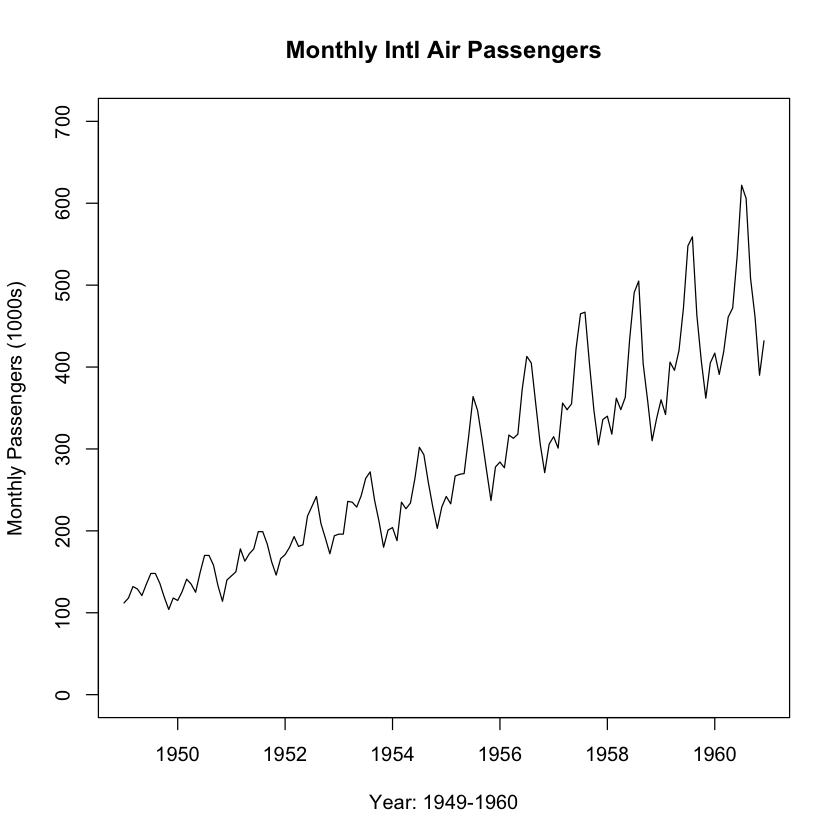

In [7]:
# Plot data
df %>% 
  plot(
    main = "Monthly Intl Air Passengers",
    xlab = "Year: 1949-1960",
    ylab = "Monthly Passengers (1000s)",
    ylim = c(0, 700)
  )

In [8]:
# SPLIT DATA ###############################################

# Use data from 1949 through 1957 for training
trn <- df %>% window(end = c(1957, 12))
trn      # Show data in Console

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336


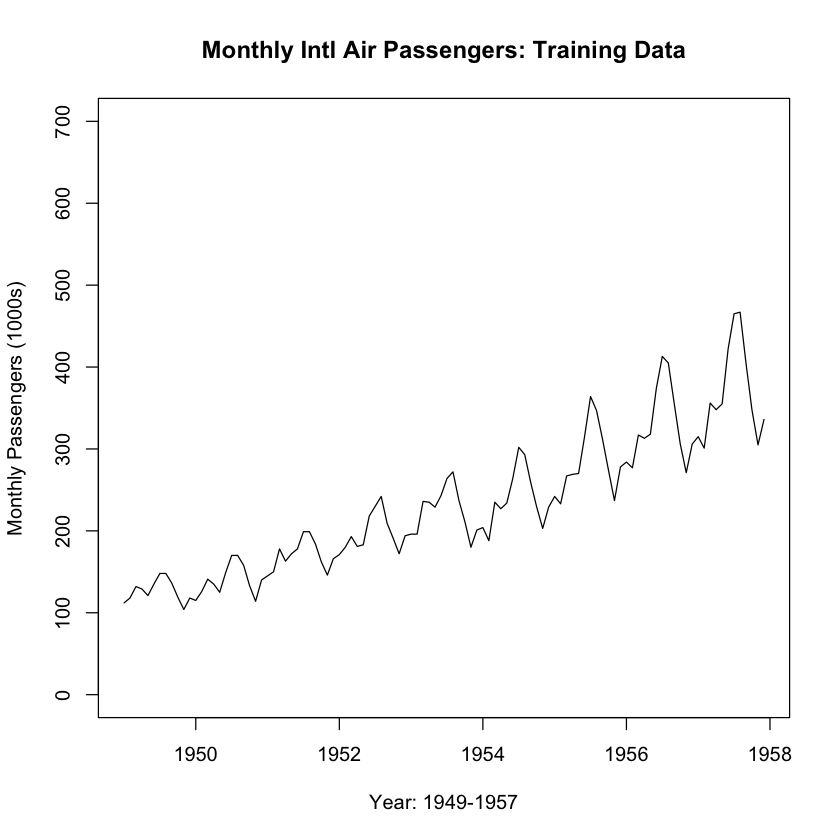

In [9]:
trn %>%  # Plot data
  plot(
    main = "Monthly Intl Air Passengers: Training Data",
    xlab = "Year: 1949-1957",
    ylab = "Monthly Passengers (1000s)",
    ylim = c(0, 700)
  )

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1958,340,318,362,348,363,435,491,505,404,359,310,337
1959,360,342,406,396,420,472,548,559,463,407,362,405
1960,417,391,419,461,472,535,622,606,508,461,390,432


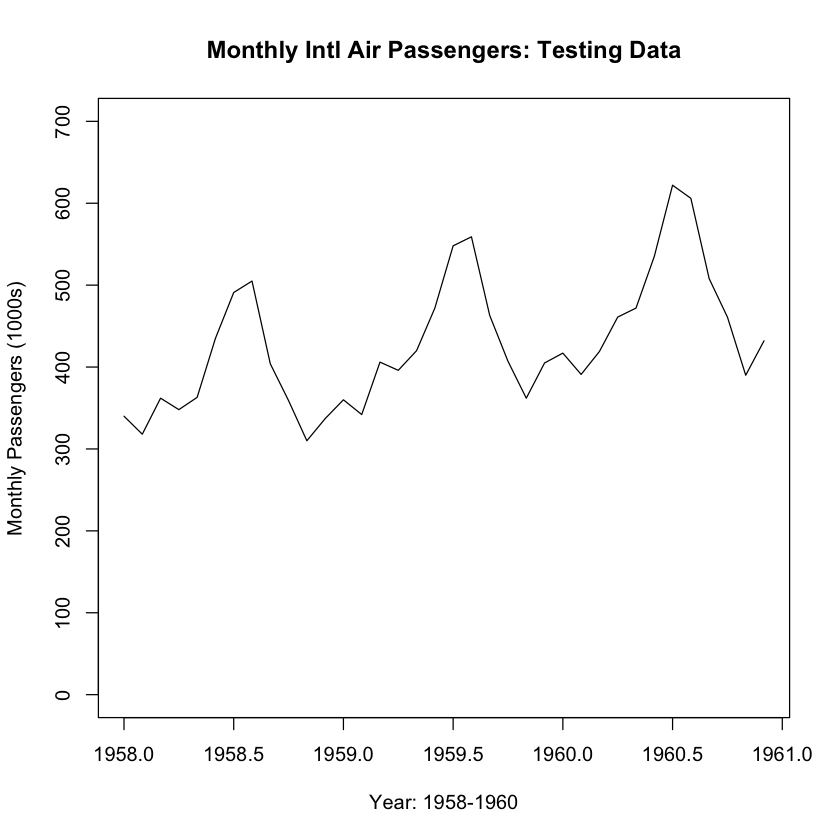

In [10]:
# Use data from 1958 through 1960 for testing
tst <- df %>% window(start = 1958)
tst      # Show data in Console
tst %>%  # Plot data
  plot(
    main = "Monthly Intl Air Passengers: Testing Data",
    xlab = "Year: 1958-1960",
    ylab = "Monthly Passengers (1000s)",
    ylim = c(0, 700)
  )

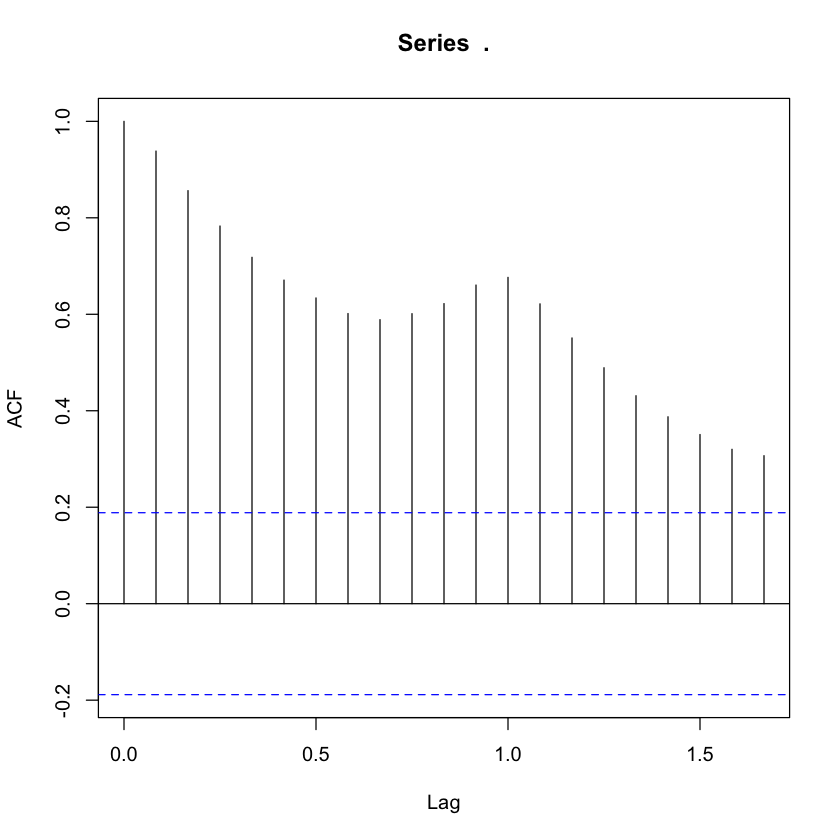

In [11]:
# TEST STATIONARITY ########################################

# ARIMA requires non-stationary data. That is, ARIMA needs
# data where means that the mean, the variance, and/or the
# covariance vary over time. Non-stationary data shows
# significant correlations when lagged. A "correlogram"
# graph shows the degree of correlation at different values
# of lag. Ideally, none of the lag values will fall in the
# range of nonsignificant correlations.
trn %>% acf()

`geom_smooth()` using formula 'y ~ x'



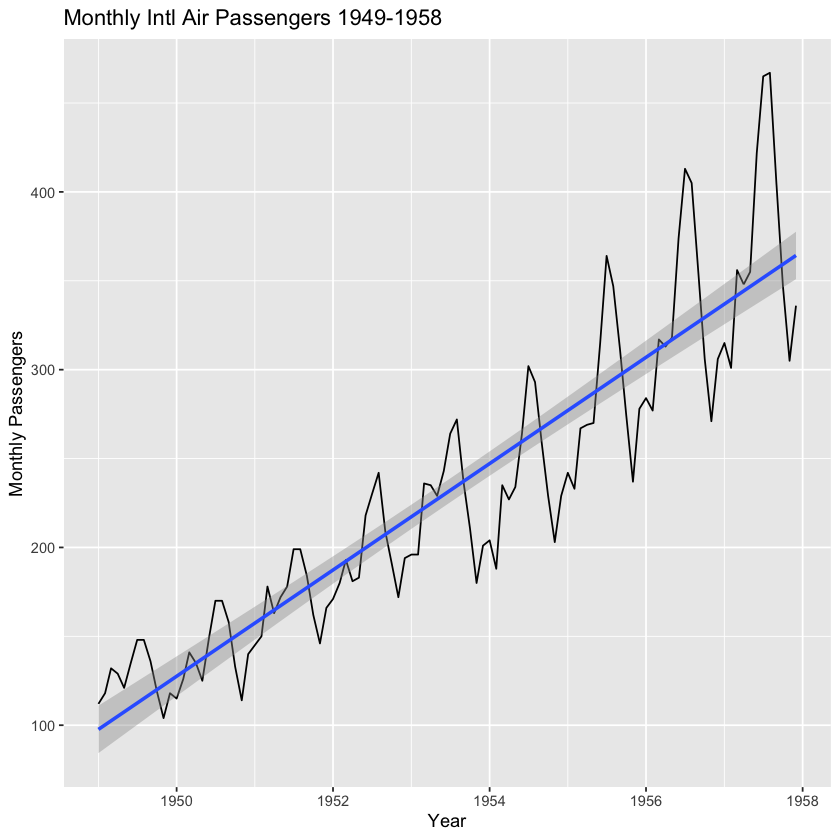

In [12]:
# LINEAR MODEL #############################################

# Graph time series using with linear regression line; the 
# `autoplot` functions helps ggplot2 work well with many 
# kinds of data, including time-series data
trn %>% 
  autoplot() +
  geom_smooth(      # Add a trend line
    method = "lm",  # Use linear regressions
    aes(y = value)  # Predict `value` in time-series
  ) +
  labs(
    x = "Year",
    y = "Monthly Passengers",
    title = "Monthly Intl Air Passengers 1949-1958"
  )

In [13]:
# MODEL DATA ###############################################

# Test auto ARIMA to have the best p, q, d parameters
trn %>% auto.arima()

# auto.arima suggests ARIMA(1,1,0)(0,1,0)[12] 
# First set of numbers is for the basic, non-seasonal model
#   1    # p: Auto-regressive (AR) order
#   1    # d: Integrate (I), or degree of differencing
#   0    # q: Moving average (MA) order
# Second set of numbers is for seasonality
#   0    # P: Auto-regressive (AR) order
#   1    # D: Integrate (I), or degree of differencing
#   0    # Q: Moving average (MA) order
# Number in square brackets (usually written as subscript)
#   12:  # M: Model period or seasonality

Series: . 
ARIMA(1,1,0)(0,1,0)[12] 

Coefficients:
          ar1
      -0.2411
s.e.   0.0992

sigma^2 estimated as 93.74:  log likelihood=-350
AIC=704   AICc=704.13   BIC=709.11

Warning message:
“`mutate_()` was deprecated in dplyr 0.7.0.
Please use `mutate()` instead.
See vignette('programming') for more help
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated.”


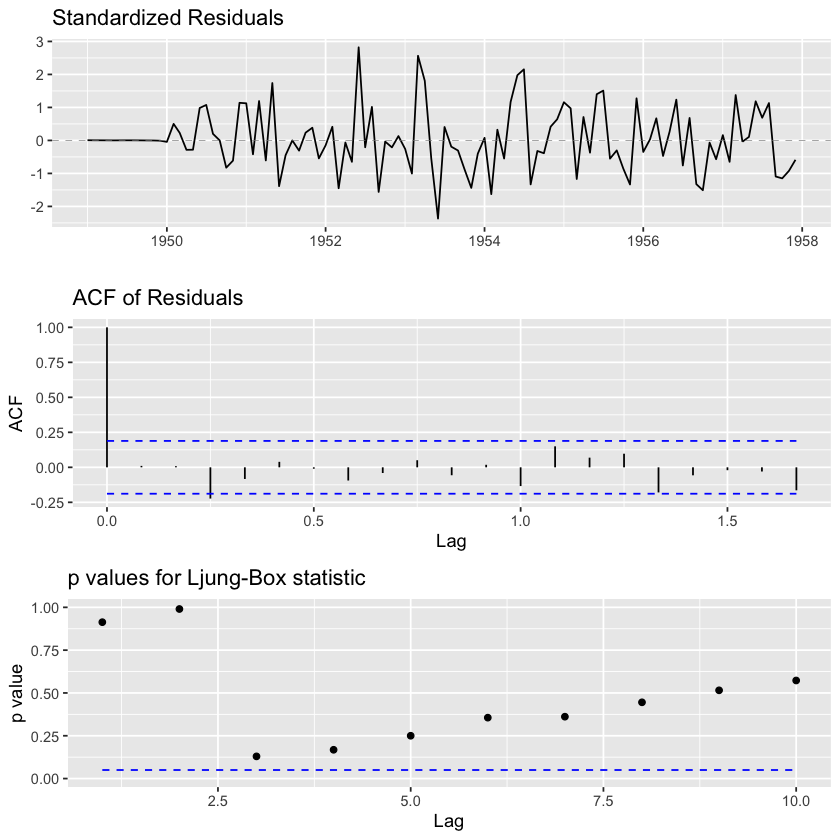

In [14]:
# See the diagnostic plots: standardized residuals, ACF 
# (autocorrelation function) of residuals, and the Ljung-Box
# test for autocorrelations
trn %>% 
  auto.arima() %>%
  ggtsdiag()

         Point Forecast    Lo 95    Hi 95
Jan 1958       345.9645 326.9882 364.9408
Feb 1958       331.7319 307.9101 355.5538
Mar 1958       386.7880 358.3653 415.2108
Apr 1958       378.7745 346.5247 411.0243
May 1958       385.7778 350.0818 421.4737
Jun 1958       452.7770 413.9455 491.6084
Jul 1958       495.7772 454.0438 537.5105
Aug 1958       497.7771 453.3312 542.2231
Sep 1958       434.7771 387.7748 481.7794
Oct 1958       377.7771 328.3505 427.2037
Nov 1958       335.7771 284.0397 387.5145
Dec 1958       366.7771 312.8278 420.7265
Jan 1959       376.7416 312.8301 440.6532
Feb 1959       362.5091 292.0378 432.9803
Mar 1959       417.5651 340.6597 494.4705
Apr 1959       409.5516 326.8088 492.2944
May 1959       416.5549 328.3380 504.7718
Jun 1959       483.5541 390.1885 576.9196
Jul 1959       526.5543 428.3084 624.8002
Aug 1959       528.5542 425.6594 631.4490
Sep 1959       465.5542 358.2117 572.8968
Oct 1959       408.5542 296.9410 520.1675
Nov 1959       366.5542 250.8278 4

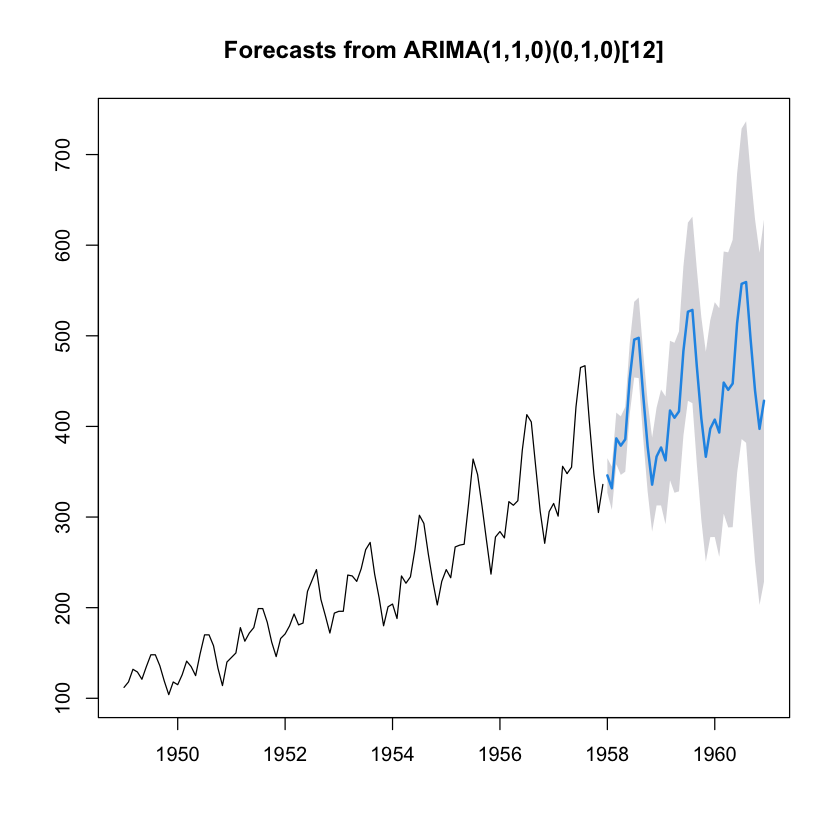

In [16]:
# FORECAST AND EVALUATE ####################################

# Use `auto.arima` to predict intervals for last three
# years; print and graph predictions, add observed values
# from testing data
trn %>% 
  auto.arima() %>%
  forecast(
    level = 95,     # 95% confidence level
    h = 36          # Forecast 36 months
  ) %T>%            # T-pipe
  print() %>%
  plot()

         Point Forecast    Lo 95    Hi 95
Jan 1958       345.9645 326.9882 364.9408
Feb 1958       331.7319 307.9101 355.5538
Mar 1958       386.7880 358.3653 415.2108
Apr 1958       378.7745 346.5247 411.0243
May 1958       385.7778 350.0818 421.4737
Jun 1958       452.7770 413.9455 491.6084
Jul 1958       495.7772 454.0438 537.5105
Aug 1958       497.7771 453.3312 542.2231
Sep 1958       434.7771 387.7748 481.7794
Oct 1958       377.7771 328.3505 427.2037
Nov 1958       335.7771 284.0397 387.5145
Dec 1958       366.7771 312.8278 420.7265
Jan 1959       376.7416 312.8301 440.6532
Feb 1959       362.5091 292.0378 432.9803
Mar 1959       417.5651 340.6597 494.4705
Apr 1959       409.5516 326.8088 492.2944
May 1959       416.5549 328.3380 504.7718
Jun 1959       483.5541 390.1885 576.9196
Jul 1959       526.5543 428.3084 624.8002
Aug 1959       528.5542 425.6594 631.4490
Sep 1959       465.5542 358.2117 572.8968
Oct 1959       408.5542 296.9410 520.1675
Nov 1959       366.5542 250.8278 4

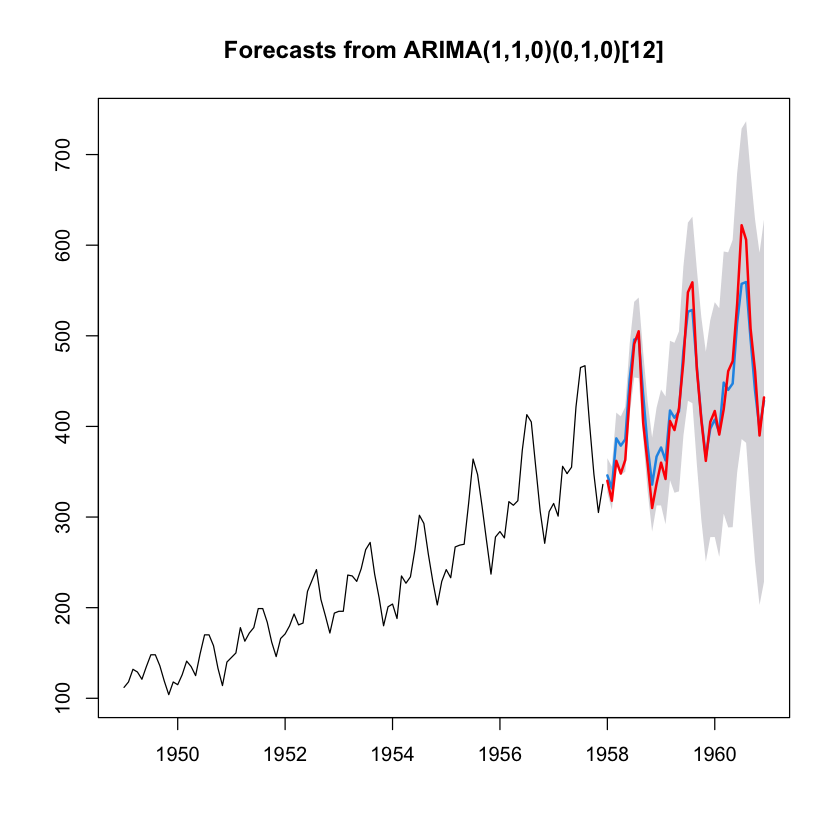

In [18]:
# Use `auto.arima` to predict intervals for last three
# years; print and graph predictions, add observed values
# from testing data
trn %>% 
  auto.arima() %>%
  forecast(
    level = 95,     # 95% confidence level
    h = 36          # Forecast 36 months
  ) %T>%            # T-pipe
  print() %>%
  plot()
tst %>% lines(lwd = 2, col = "red")  # Add testing data